# The Sparks Foundation GRIP - APR 2022
# Data Science and Business Analytics Tasks
# Beginner Level Task 1 - Prediction using Supervised ML
# Name: Ashutosh Madhav Kakad

# Importing the Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Reading the Data

In [2]:
data = pd.read_csv('student_scores.csv')

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

In [7]:
data.shape

(25, 2)

In [8]:
data['Hours'].value_counts()

2.5    2
2.7    2
4.5    1
6.9    1
3.8    1
4.8    1
7.4    1
6.1    1
1.9    1
8.9    1
1.1    1
3.3    1
5.9    1
5.1    1
7.7    1
8.3    1
5.5    1
9.2    1
1.5    1
3.5    1
8.5    1
3.2    1
7.8    1
Name: Hours, dtype: int64

In [9]:
data['Scores'].value_counts()

30    3
21    1
41    1
76    1
35    1
54    1
69    1
67    1
24    1
95    1
17    1
42    1
62    1
47    1
85    1
25    1
81    1
60    1
88    1
20    1
75    1
27    1
86    1
Name: Scores, dtype: int64

In [10]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [11]:
data.mean()

Hours      5.012
Scores    51.480
dtype: float64

# Visualization

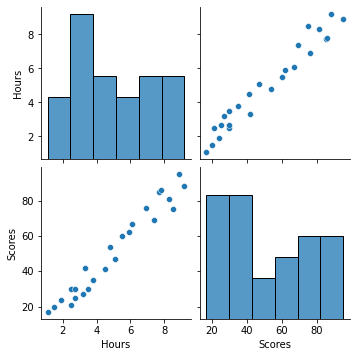

In [12]:
sns.pairplot(data)

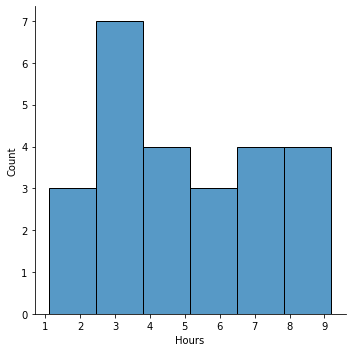

In [13]:
sns.displot(data['Hours'])

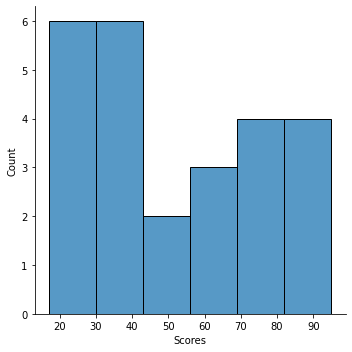

In [14]:
sns.displot(data['Scores'])

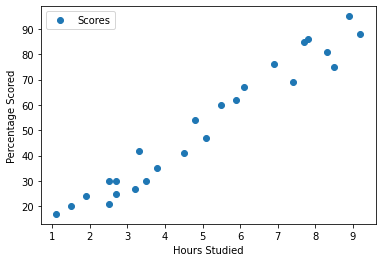

In [15]:
data.plot(x='Hours', y='Scores', style='o')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')
plt.show()

<AxesSubplot:xlabel='Hours'>

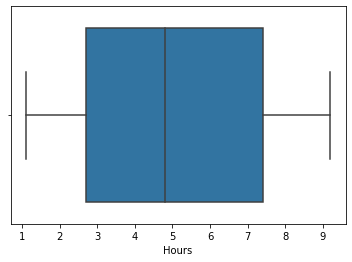

In [16]:
sns.boxplot(data['Hours'])

<AxesSubplot:xlabel='Scores'>

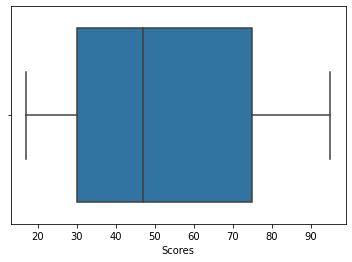

In [17]:
sns.boxplot(data['Scores'])

<AxesSubplot:>

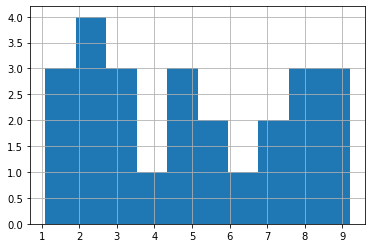

In [18]:
data['Hours'].hist()

<AxesSubplot:>

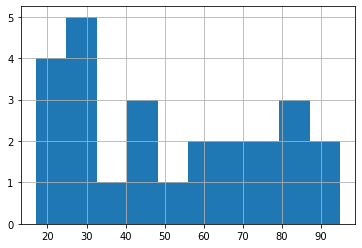

In [19]:
data['Scores'].hist()

# Correlation

In [20]:
corr = data.corr()
corr

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


<AxesSubplot:>

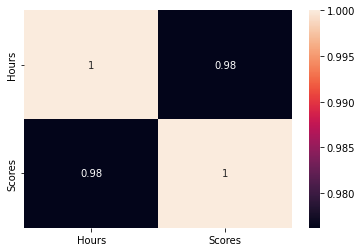

In [21]:
sns.heatmap(corr, annot=True)

# Preparing the Data

In [22]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

# Train Test Split

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Training the Model using Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
reg = LinearRegression()

In [27]:
reg.fit(X_train, y_train)
print('Training complete')

Training complete


## Plotting the Regression Line

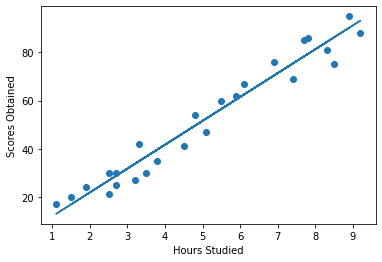

In [28]:
line = reg.coef_ * X + reg.intercept_
plt.scatter(X,y)
plt.plot(X, line)
plt.xlabel('Hours Studied')
plt.ylabel('Scores Obtained')
plt.show()

# Prediction

In [29]:
print('X test:\n',X_test)

X test:
 [[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [30]:
y_pred = reg.predict(X_test)
df = pd.DataFrame({'Actual':y_test,
                   'Predicted':y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


<AxesSubplot:>

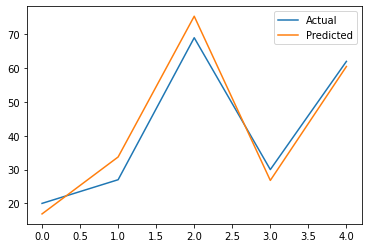

In [31]:
df.plot()

In [32]:
hours = 9.25
pred = reg.predict([[hours]])
print('No of hours = {}'.format(hours))
print('Predicted Score = {}'.format(pred[0]))

No of hours = 9.25
Predicted Score = 93.69173248737539


# Evaluation

In [33]:
from sklearn import metrics

In [34]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002982


# THANK YOU